In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
df = pd.read_csv('data/data_train.csv', usecols = [
       'SALE PRICE', 'histdist', 'landmark', 'landuse', 'YEAR BUILT',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'easements', 'lotarea',
       'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'assessland', 'assesstot', 'exemptland',
       'exempttot', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'DensityPop', 'IncomePerCap', 'Poverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Employed', 'Unemployment',
       'distance_subway', 'distance_bus', 'park_num', 'park_area',
       'park_top_level', 'park_distance', 'FELONY', 'VIOLATION', 'MISDEMEANOR',
       'Num of SAT Test Takers', 'satReadingSum', 'satMathSum',
       'satWritingSum'])

In [3]:
df['landuse'] = df['landuse'].astype(str)
df['sat'] = df['satReadingSum'] + df['satMathSum'] + df['satWritingSum']
df['crime'] = df['FELONY'] + df['VIOLATION'] + df['MISDEMEANOR']
df.drop(['satReadingSum', 'satMathSum', 'satWritingSum', 'FELONY', 'VIOLATION', 'MISDEMEANOR'], axis=1, inplace=True)

df = df[['SALE PRICE', 'YEAR BUILT', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'easements',
       'lotarea', 'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'assessland', 'assesstot', 'exemptland',
       'exempttot', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'DensityPop', 'IncomePerCap', 'Poverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Employed', 'Unemployment',
       'distance_subway', 'distance_bus', 'park_num', 'park_area',
       'park_top_level', 'park_distance', 'Num of SAT Test Takers', 'sat', 'crime',
       'histdist', 'landmark', 'landuse']]
print(df.shape)
df.head()

(8885, 56)


,SALE PRICE,YEAR BUILT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,easements,lotarea,bldgarea,...,park_num,park_area,park_top_level,park_distance,Num of SAT Test Takers,sat,crime,histdist,landmark,landuse
0,3750000,110,3,0,3,2018,3354,0.0,2018.0,3354.0,...,5,22.051,2,0.001133,3825,1519.0,1526.0,Mount Morris Park Historic District,NaN,2.0
1,5000000,119,26,4,30,5060,20310,0.0,5060.0,20310.0,...,6,179.671,2,0.001841,4005,1370.0,1139.0,NaN,NaN,4.0
2,5000000,119,26,4,30,5060,20310,0.0,5060.0,20310.0,...,6,179.671,2,0.001792,4005,1370.0,1131.0,NaN,NaN,4.0
3,29100000,99,26,1,27,4642,27141,0.0,4642.0,27141.0,...,8,843.074,3,0.000745,3825,1519.0,1672.0,NaN,NaN,4.0
4,2350000,116,0,0,0,0,0,0.0,10013.0,23521.0,...,2,844.633,3,0.001081,9100,1374.0,206.0,Upper East Side Historic District,NaN,3.0


# Preprocessing

## Cleaning

### Extremum filter

In [4]:
sale_price = sorted(df['SALE PRICE'])

In [5]:
# percent_right = 0.9973 # 3 std
percent_right = 0.9545 # 2 std
percent_left = len(list(filter(lambda x: x<200000, sale_price)))/len(sale_price)
percent_left

0.03421496904895892

In [6]:
price_left = sale_price[int(len(sale_price) * percent_left)]
price_right = sale_price[int(len(sale_price) * percent_right)]

In [7]:
df = df.fillna(0) # fillna

# df = df[(df['SALE PRICE'] > price_left) & (df['SALE PRICE'] < price_right)]
df = df[df['SALE PRICE'] > price_left] # delete left
# df = df[df['SALE PRICE'] < price_right] # delete right

print(df.shape)
df.head()

(8577, 56)


,SALE PRICE,YEAR BUILT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,easements,lotarea,bldgarea,...,park_num,park_area,park_top_level,park_distance,Num of SAT Test Takers,sat,crime,histdist,landmark,landuse
0,3750000,110,3,0,3,2018,3354,0.0,2018.0,3354.0,...,5,22.051,2,0.001133,3825,1519.0,1526.0,Mount Morris Park Historic District,0,2.0
1,5000000,119,26,4,30,5060,20310,0.0,5060.0,20310.0,...,6,179.671,2,0.001841,4005,1370.0,1139.0,0,0,4.0
2,5000000,119,26,4,30,5060,20310,0.0,5060.0,20310.0,...,6,179.671,2,0.001792,4005,1370.0,1131.0,0,0,4.0
3,29100000,99,26,1,27,4642,27141,0.0,4642.0,27141.0,...,8,843.074,3,0.000745,3825,1519.0,1672.0,0,0,4.0
4,2350000,116,0,0,0,0,0,0.0,10013.0,23521.0,...,2,844.633,3,0.001081,9100,1374.0,206.0,Upper East Side Historic District,0,3.0


### Numeric & Categoric split

In [8]:
numeric_list = ['YEAR BUILT',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'easements', 'lotarea',
       'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs',
       'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth',
       'bldgfront', 'bldgdepth', 'assessland', 'assesstot', 'exemptland',
       'exempttot', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'DensityPop', 'IncomePerCap', 'Poverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Employed', 'Unemployment',
       'distance_subway', 'distance_bus', 'park_num', 'park_area',
       'park_top_level', 'park_distance', 'crime',
       'Num of SAT Test Takers', 'sat']

categoric_list = ['histdist', 'landmark', 'landuse']

In [9]:
Y = df[['SALE PRICE']]
X = df[numeric_list]

### feature selection

In [10]:
import seaborn as sns

In [11]:
corr = df.corr()

fig,ax = plt.subplots(figsize = (20,20))
hm = sns.heatmap(round(corr,2), annot = True, ax = ax, cmap = 'coolwarm', fmt = '.1f', linewidth = .05)
fig.subplots_adjust(top = 0.95)
plt.title('Features Correlation Heatmap', fontsize=14)
plt.tight_layout()

#### method 1
https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

In [12]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = df.iloc[:,:-3].columns[columns]
df_select = df[selected_columns]
print(len(selected_columns))

44


In [13]:
selected_columns

Index(['SALE PRICE', 'YEAR BUILT', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'easements',
       'lotarea', 'comarea', 'officearea', 'retailarea', 'strgearea',
       'factryarea', 'otherarea', 'numbldgs', 'numfloors', 'lotdepth',
       'bldgfront', 'bldgdepth', 'exempttot', 'builtfar', 'residfar',
       'commfar', 'facilfar', 'DensityPop', 'IncomePerCap', 'Poverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Employed', 'Unemployment', 'distance_subway', 'distance_bus',
       'park_num', 'park_area', 'park_top_level', 'park_distance',
       'Num of SAT Test Takers', 'sat', 'crime'],
      dtype='object')

fig,ax = plt.subplots(figsize = (20,20))
corr = df_select.corr()
hm = sns.heatmap(round(corr,2), annot = True, ax = ax, cmap = 'coolwarm', fmt = '.1f', linewidth = .05)
fig.subplots_adjust(top = 0.95)

plt.title('Features Correlation Heatmap', fontsize=14)

plt.tight_layout()

import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
df_select_modeled, selected_columns = backwardElimination(df_select.iloc[:,1:].values, df_select.iloc[:,0].values, SL, selected_columns)
print(len(selected_columns))

fig,ax = plt.subplots(figsize = (20,20))
corr = pd.DataFrame(df_select_modeled).corr()
hm = sns.heatmap(round(corr,2), annot = True, ax = ax, cmap = 'coolwarm', fmt = '.1f', linewidth = .05)
fig.subplots_adjust(top = 0.95)

plt.title('Features Correlation Heatmap', fontsize=14)

plt.tight_layout()

## Standardize


### method 1
https://blog.csdn.net/FrankieHello/article/details/79659111

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss = StandardScaler()
std_data = ss.fit_transform(df[numeric_list])
origin_data = ss.inverse_transform(std_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### method 2
https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

In [16]:
def standardize(df):
    return (df-df.mean())/df.std()

In [17]:
def standardize_inverse(df, mean, std):
    return std * df + mean

In [18]:
temp = standardize(df['YEAR BUILT'])
temp.head()

0    0.538397
1    0.708449
2    0.708449
3    0.330556
4    0.651765
Name: YEAR BUILT, dtype: float64

In [19]:
mean, std = df['YEAR BUILT'].mean(), df['YEAR BUILT'].std()

In [20]:
standardize_inverse(temp, mean, std).head()

0    110.0
1    119.0
2    119.0
3     99.0
4    116.0
Name: YEAR BUILT, dtype: float64

In [21]:
X_standardized = X.apply(standardize)
Y_standardized = Y.apply(standardize)

## Train & Test split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [23]:
X_standardized_train, X_standardized_test, Y_standardized_train, Y_standardized_test = \
train_test_split(X_standardized, Y_standardized, test_size=0.33, random_state=42)

## Whitening

http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/

## PCA

https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/  
https://stackoverflow.com/questions/26182329/how-do-i-convert-new-data-into-the-pca-components-of-my-training-data

n_components：  
默认值为保留所有特征值维度，即不进行主成分降维；  
取大于等于1的整数时，即指定我们希望降维后的维数；  
取0-1的浮点数时，即指定降维后的方差和占比，比例越大，保留的信息越多。系统会自行计算保留的维度个数。  
https://blog.csdn.net/Genius9_9/article/details/81098840  

所以在实际使用PCA时，我们不需要选择k，而是直接设置n_components为float数据。  
https://blog.csdn.net/ybdesire/article/details/64546435

In [24]:
from sklearn.decomposition import PCA

### method 1

In [25]:
n = X_standardized_train.shape[1] # how many eigenvectors we choose
pca = PCA(n,whiten=True) #PCA model, paramerized by the target number of components or target percentage of variance

pca.fit(X_standardized_train) #fit the model to the data

PCA(copy=True, iterated_power='auto', n_components=52, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [26]:
# X_train_numeric = pca.transform(X_train_numeric) #find principal components

Text(0, 0.5, 'variance')

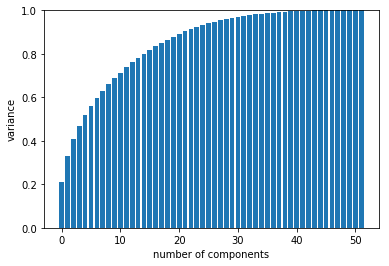

In [27]:
#Plot explained variance per number of leading PC's to choose
eigenvalues = pca.explained_variance_
plt.bar(np.arange(n), eigenvalues.cumsum()/eigenvalues.sum(),align='center');
plt.ylim(0,1)
# plt.xlim(0,n)
plt.xlabel('number of components')
plt.ylabel('variance')

In [28]:
p=0.8
pca = PCA(p)
P = pca.fit_transform(X_standardized_train)
eigenvalues = pca.explained_variance_
print("we need %d PCs to explain %.2f percent of variance"%(P.shape[1],100*p))

we need 15 PCs to explain 80.00 percent of variance


In [29]:
p=0.9
pca = PCA(p)
P = pca.fit_transform(X_standardized_train)
eigenvalues = pca.explained_variance_
print("we need %d PCs to explain %.2f percent of variance"%(P.shape[1],100*p))

we need 22 PCs to explain 90.00 percent of variance


In [30]:
p=0.95
pca = PCA(p)
P = pca.fit_transform(X_standardized_train)
eigenvalues = pca.explained_variance_
print("we need %d PCs to explain %.2f percent of variance"%(P.shape[1],100*p))

we need 28 PCs to explain 95.00 percent of variance


### method 2

In [31]:
p=0.8
pca = PCA(p,whiten=True) #PCA model, paramerized by the target number of components or target percentage of variance

pca.fit(X_standardized_train) #fit the model to the data
eigenvalues = pca.explained_variance_

X_standardized_train_PCA = pca.transform(X_standardized_train) #find principal components
n = X_standardized_train_PCA.shape[1] # how many eigenvectors we choose

print("we need %d PCs to explain %.2f percent of variance"%(n,100*p))

we need 15 PCs to explain 80.00 percent of variance


In [32]:
pd.DataFrame(X_standardized_train_PCA).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000e+00,1.878151e-17,5.295687e-16,2.619411e-16,-4.035066e-17,-4.925322e-16,5.118621e-16,-5.932784e-18,1.732827e-16,-1.502038e-16,-6.904834e-17,-9.794469e-16,-4.048207e-16,-1.725919e-16,2.350322e-16
1,1.878151e-17,1.000000e+00,2.659003e-17,3.537882e-16,2.249530e-16,-1.127253e-17,-7.467192e-17,-2.280450e-16,-1.503306e-16,4.367457e-18,-6.246816e-17,-4.485273e-16,-8.591184e-17,-2.243636e-16,3.206445e-17
2,5.295687e-16,2.659003e-17,1.000000e+00,3.750312e-16,1.292651e-16,-1.168826e-16,-9.985727e-16,-2.820488e-17,-3.218729e-16,6.865072e-16,-8.498182e-17,2.746039e-16,-6.843960e-17,-6.247686e-16,-6.142220e-16
3,2.619411e-16,3.537882e-16,3.750312e-16,1.000000e+00,1.819065e-16,-1.208781e-16,1.256900e-16,-2.577959e-17,1.665624e-16,-4.407846e-16,-5.031755e-16,3.174402e-16,-2.537183e-16,1.791237e-16,-2.558707e-16
4,-4.035066e-17,2.249530e-16,1.292651e-16,1.819065e-16,1.000000e+00,6.985709e-16,-4.607281e-16,1.273906e-16,4.944309e-17,2.168752e-16,2.721641e-16,3.006238e-16,-1.379807e-17,-2.342000e-16,1.692993e-16
5,-4.925322e-16,-1.127253e-17,-1.168826e-16,-1.208781e-16,6.985709e-16,1.000000e+00,-3.668181e-16,-1.443000e-16,-5.504204e-16,-5.562372e-16,-3.156744e-16,-6.451722e-17,-1.387054e-16,1.356521e-16,-1.778072e-16
6,5.118621e-16,-7.467192e-17,-9.985727e-16,1.256900e-16,-4.607281e-16,-3.668181e-16,1.000000e+00,-8.156709e-16,-4.799855e-17,-1.969124e-16,3.834763e-16,-5.843406e-18,-1.073312e-16,-5.355159e-16,-2.131768e-16
7,-5.932784e-18,-2.280450e-16,-2.820488e-17,-2.577959e-17,1.273906e-16,-1.443000e-16,-8.156709e-16,1.000000e+00,-3.319847e-16,-3.069395e-16,-5.256408e-18,1.480165e-16,-8.510744e-17,2.492929e-18,-3.318615e-16
8,1.732827e-16,-1.503306e-16,-3.218729e-16,1.665624e-16,4.944309e-17,-5.504204e-16,-4.799855e-17,-3.319847e-16,1.000000e+00,-4.000281e-17,4.798840e-16,2.124023e-16,-1.545326e-16,-2.080774e-16,1.633690e-16
9,-1.502038e-16,4.367457e-18,6.865072e-16,-4.407846e-16,2.168752e-16,-5.562372e-16,-1.969124e-16,-3.069395e-16,-4.000281e-17,1.000000e+00,-4.025790e-16,1.133063e-16,-2.679802e-16,4.915901e-16,9.645606e-17


In [33]:
X_standardized_test_PCA = pca.transform(X_standardized_test)  #Don't use fit_transform, just apply the pca we learned before
pd.DataFrame(X_standardized_test_PCA).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,-0.029686,-0.025594,0.002038,0.046722,-0.014042,0.050131,-0.027358,-0.109330,-0.082581,0.072338,0.000528,-0.013533,0.047147,-0.006422
1,-0.029686,1.000000,0.013865,0.041528,0.007341,0.045636,0.011851,0.024941,-0.054394,-0.001933,-0.004336,-0.011431,0.000001,0.020666,0.022469
2,-0.025594,0.013865,1.000000,0.063005,0.029079,-0.288637,-0.121459,0.002370,0.151756,-0.024226,-0.050201,-0.092689,-0.020286,-0.018580,-0.530417
3,0.002038,0.041528,0.063005,1.000000,-0.048121,0.145380,-0.003478,-0.019495,0.000130,0.034891,0.058487,-0.050840,0.115666,0.057507,0.041370
4,0.046722,0.007341,0.029079,-0.048121,1.000000,0.038568,-0.004802,-0.011153,0.035280,-0.013591,-0.036308,-0.025948,-0.031577,0.033597,-0.034788
5,-0.014042,0.045636,-0.288637,0.145380,0.038568,1.000000,0.260797,0.138296,-0.382568,0.157514,0.017574,0.092986,0.152778,-0.039204,-0.235543
6,0.050131,0.011851,-0.121459,-0.003478,-0.004802,0.260797,1.000000,0.029704,-0.434429,0.036416,-0.091438,-0.128609,-0.006467,-0.003432,0.151213
7,-0.027358,0.024941,0.002370,-0.019495,-0.011153,0.138296,0.029704,1.000000,0.156933,-0.093666,-0.000421,-0.032823,-0.050850,0.018774,-0.039006
8,-0.109330,-0.054394,0.151756,0.000130,0.035280,-0.382568,-0.434429,0.156933,1.000000,0.181040,-0.215034,-0.185946,0.043082,0.003308,0.178635
9,-0.082581,-0.001933,-0.024226,0.034891,-0.013591,0.157514,0.036416,-0.093666,0.181040,1.000000,0.119009,-0.315817,0.110825,0.076024,-0.103620


# Modeling

### predict out of sample
http://www.statsmodels.org/0.6.1/examples/notebooks/generated/predict.html

In [34]:
from sklearn.metrics import r2_score

### Cross-validation
https://scikit-learn.org/stable/modules/cross_validation.html  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html  
https://morvanzhou.github.io/tutorials/machine-learning/sklearn/3-2-cross-validation1/  

Scoring parameter: https://scikit-learn.org/stable/modules/model_evaluation.html

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
print("In sample R-squared: %f"%reg.score(X_train, Y_train))
print("Out of sample R-squared: %f"%reg.score(X_test, Y_test))

In sample R-squared: 0.687777
Out of sample R-squared: 0.735486


In [37]:
reg = LinearRegression()
scores = cross_val_score(reg, X_train, Y_train, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.34 (+/- 0.73)


array([ 0.79934916, -0.01850434,  0.85389043,  0.03193803,  0.1479941 ,
        0.25610652,  0.18020532, -0.21850572,  0.70843313,  0.66659217])

## Multivariate linear regression model

In [38]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### original

In [39]:
mod = sm.OLS(Y_train, X_train).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     253.2
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        17:33:44   Log-Likelihood:            -1.0367e+05
No. Observations:                5746   AIC:                         2.074e+05
Df Residuals:                    5695   BIC:                         2.078e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
YEAR BUILT              3.875e+04   4918.358      7.878      0.000    2.91e+04    4.84e+04
RESIDENTIAL UNITS      -3.405e+05   3.28e+04    -10.385      0.000   -4.05e+05   -2.76e+05
COMMERCIAL UNITS        5.397e+05    5.7e+04      9.470      0.000    4.28e+05    6.51e+05
TOTAL UNITS             1.993e+05   3.18e+04      6.263      0.000    1.37e+05    2.62e+05
LAND SQUARE FEET        -839.7774    124.120     -6.766      0.000   -1083.100    -596.454
GROSS SQUARE FEET        777.5728     25.786     30.154      0.000     727.022     828.124
easements               1.486e+06    2.7e+06      0.551      0.582    -3.8e+06    6.78e+06
lotarea                  -14.2814     21.121     -0.676      0.499     -55.686      27.123
bldgarea                -227.8369     32.520     -7.006      0.000    -291.589    -164.085
comarea                  143.0978     44.113      3.244      0.001      56.619     229.576
resarea                  208.1415     31.709      6.564      0.000     145.980     270.303
officearea              -134.3788     40.765     -3.296      0.001    -214.293     -54.465
retailarea               397.9842     37.167     10.708      0.000     325.123     470.846
garagearea                63.0245     51.156      1.232      0.218     -37.261     163.310
strgearea               -485.6121     98.466     -4.932      0.000    -678.643    -292.582
factryarea               180.8951     47.622      3.799      0.000      87.539     274.251
otherarea                361.8590     62.882      5.755      0.000     238.585     485.133
numbldgs               -4850.8781   1.16e+05     -0.042      0.967   -2.31e+05    2.22e+05
numfloors              -1.109e+05   7.61e+04     -1.458      0.145    -2.6e+05    3.82e+04
unitsres                4.093e+05   8.28e+04      4.941      0.000    2.47e+05    5.72e+05
unitstotal             -4.213e+05   8.26e+04     -5.100      0.000   -5.83e+05   -2.59e+05
lotfront                1.575e+04   5734.100      2.746      0.006    4507.265     2.7e+04
lotdepth               -3915.3151   3931.948     -0.996      0.319   -1.16e+04    3792.799
bldgfront               5879.8110   3979.649      1.477      0.140   -1921.816    1.37e+04
bldgdepth              -3454.8642   3449.754     -1.001      0.317   -1.02e+04    3307.967
assessland                 1.8147      0.201      9.036      0.000       1.421       2.208
assesstot                 -0.0402      0.066     -0.613      0.540      -0.169       0.088
exemptland                 2.8880      0.960      3.008      0.003       1.006       4.771
exempttot                 -0.4174      0.086     -4.848      0.000      -0.586      -0.249
builtfar               -3.107e+05   1.29e+05     -2.400      0.016   -5.64e+05   -5.69e+04
residfar                6.195e+05   1.81e+05      3.418      0.001    2.64e+05  

In [40]:
Y_pred = mod.predict(X_test)
r2_score(Y_test, Y_pred)

0.7351365908723696

**Cross-validation**

In [41]:
reg = LinearRegression().fit(X_train, Y_train)
print("In sample R-squared: %f"%reg.score(X_train, Y_train))
print("Out of sample R-squared: %f"%reg.score(X_test, Y_test))

In sample R-squared: 0.687777
Out of sample R-squared: 0.735486


In [42]:
reg = LinearRegression()
scores = cross_val_score(reg, X_train, Y_train, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.34 (+/- 0.73)


array([ 0.79934916, -0.01850434,  0.85389043,  0.03193803,  0.1479941 ,
        0.25610652,  0.18020532, -0.21850572,  0.70843313,  0.66659217])

### log

In [43]:
mod = sm.OLS(np.log(Y_train), X_train).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.481e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        17:33:45   Log-Likelihood:                -6809.1
No. Observations:                5746   AIC:                         1.372e+04
Df Residuals:                    5695   BIC:                         1.406e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
YEAR BUILT                 0.0012      0.000      5.269      0.000       0.001       0.002
RESIDENTIAL UNITS          0.0016      0.002      1.002      0.316      -0.002       0.005
COMMERCIAL UNITS           0.0119      0.003      4.373      0.000       0.007       0.017
TOTAL UNITS                0.0135      0.002      8.863      0.000       0.010       0.016
LAND SQUARE FEET           0.0001   5.93e-06     17.166      0.000    9.01e-05       0.000
GROSS SQUARE FEET      -2.639e-06   1.23e-06     -2.143      0.032   -5.05e-06   -2.25e-07
easements                  0.3233      0.129      2.509      0.012       0.071       0.576
lotarea                 7.299e-06   1.01e-06      7.236      0.000    5.32e-06    9.28e-06
bldgarea                 2.24e-06   1.55e-06      1.442      0.149   -8.05e-07    5.28e-06
comarea                -1.002e-05   2.11e-06     -4.755      0.000   -1.41e-05   -5.89e-06
resarea                -1.647e-06   1.51e-06     -1.088      0.277   -4.62e-06    1.32e-06
officearea              6.485e-06   1.95e-06      3.331      0.001    2.67e-06    1.03e-05
retailarea              9.402e-06   1.78e-06      5.297      0.000    5.92e-06    1.29e-05
garagearea              5.794e-06   2.44e-06      2.372      0.018       1e-06    1.06e-05
strgearea               2.578e-05    4.7e-06      5.482      0.000    1.66e-05     3.5e-05
factryarea             -1.728e-06   2.27e-06     -0.760      0.447   -6.19e-06    2.73e-06
otherarea               2.067e-05      3e-06      6.882      0.000    1.48e-05    2.66e-05
numbldgs                  -0.0069      0.006     -1.253      0.210      -0.018       0.004
numfloors                 -0.0146      0.004     -4.018      0.000      -0.022      -0.007
unitsres                   0.0094      0.004      2.367      0.018       0.002       0.017
unitstotal                -0.0133      0.004     -3.374      0.001      -0.021      -0.006
lotfront                  -0.0014      0.000     -5.161      0.000      -0.002      -0.001
lotdepth                  -0.0014      0.000     -7.413      0.000      -0.002      -0.001
bldgfront                 -0.0006      0.000     -2.925      0.003      -0.001      -0.000
bldgdepth                  0.0004      0.000      2.195      0.028    3.87e-05       0.001
assessland              2.298e-08   9.59e-09      2.396      0.017    4.18e-09    4.18e-08
assesstot               2.239e-08   3.13e-09      7.152      0.000    1.63e-08    2.85e-08
exemptland              2.018e-07   4.59e-08      4.401      0.000    1.12e-07    2.92e-07
exempttot              -2.283e-08   4.11e-09     -5.552      0.000   -3.09e-08   -1.48e-08
builtfar                  -0.0118      0.006     -1.911      0.056      -0.024       0.000
residfar                  -0.0167      0.009     -1.928      0.054      -0.034  

In [44]:
Y_pred =  mod.predict(X_test) 
r2_score(np.log(Y_test), Y_pred)

0.4076467414808922

**Cross-validation**

In [45]:
reg = LinearRegression().fit(X_train, np.log(Y_train))
print("In sample R-squared: %f"%reg.score(X_train, np.log(Y_train)))
print("Out of sample R-squared: %f"%reg.score(X_test, np.log(Y_test)))

In sample R-squared: 0.446089
Out of sample R-squared: 0.408152


In [46]:
reg = LinearRegression()
scores = cross_val_score(reg, X_train, np.log(Y_train), cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: -2.54 (+/- 17.12)


array([ 4.00775978e-01,  4.11099616e-01,  4.48474571e-01, -5.59022368e-03,
       -2.82158135e+01,  1.98104593e-01,  4.28036531e-01,  9.46217286e-02,
        3.99080960e-01,  4.70959250e-01])

### stardardized

In [47]:
mod = sm.OLS(Y_standardized_train, X_standardized_train).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     246.0
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        17:33:45   Log-Likelihood:                -4889.9
No. Observations:                5746   AIC:                             9882.
Df Residuals:                    5695   BIC:                         1.022e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
YEAR BUILT                 0.0700      0.009      7.857      0.000       0.053       0.087
RESIDENTIAL UNITS         -0.0789      0.009     -8.475      0.000      -0.097      -0.061
COMMERCIAL UNITS           0.1809      0.019      9.421      0.000       0.143       0.219
TOTAL UNITS                0.0164      0.009      1.885      0.059      -0.001       0.033
LAND SQUARE FEET          -0.1065      0.016     -6.832      0.000      -0.137      -0.076
GROSS SQUARE FEET          0.9042      0.030     29.982      0.000       0.845       0.963
easements                  0.0043      0.008      0.525      0.600      -0.012       0.020
lotarea                   -0.0466      0.081     -0.573      0.566      -0.206       0.113
bldgarea                  -4.1821      0.600     -6.966      0.000      -5.359      -3.005
comarea                    0.3730      0.116      3.229      0.001       0.147       0.599
resarea                    3.3274      0.513      6.484      0.000       2.321       4.333
officearea                -0.0964      0.030     -3.261      0.001      -0.154      -0.038
retailarea                 0.2717      0.025     10.784      0.000       0.222       0.321
garagearea                 0.0688      0.055      1.257      0.209      -0.038       0.176
strgearea                 -0.0363      0.007     -4.958      0.000      -0.051      -0.022
factryarea                 0.0541      0.014      3.866      0.000       0.027       0.082
otherarea                  0.0562      0.010      5.795      0.000       0.037       0.075
numbldgs                  -0.0015      0.014     -0.107      0.915      -0.029       0.026
numfloors                 -0.0302      0.021     -1.439      0.150      -0.071       0.011
unitsres                   5.8409      1.164      5.018      0.000       3.559       8.123
unitstotal                -6.0540      1.169     -5.179      0.000      -8.346      -3.762
lotfront                   0.1198      0.044      2.730      0.006       0.034       0.206
lotdepth                  -0.0206      0.019     -1.058      0.290      -0.059       0.018
bldgfront                  0.0308      0.020      1.534      0.125      -0.009       0.070
bldgdepth                 -0.0186      0.018     -1.022      0.307      -0.054       0.017
assessland                 0.4843      0.054      8.940      0.000       0.378       0.590
assesstot                 -0.0363      0.079     -0.458      0.647      -0.192       0.119
exemptland                 0.1932      0.064      3.035      0.002       0.068       0.318
exempttot                 -0.0627      0.013     -4.880      0.000      -0.088      -0.038
builtfar                  -0.0484      0.020     -2.418      0.016      -0.088      -0.009
residfar                   0.0587      0.018      3.278      0.001       0.024  

In [48]:
from sklearn.metrics import r2_score
Y_pred = mod.predict(X_standardized_test)
r2_score(Y_standardized_test, Y_pred)

0.7354872979465332

**Cross-validation**

In [49]:
reg = LinearRegression().fit(X_standardized_train, Y_standardized_train)
print("In sample R-squared: %f"%reg.score(X_standardized_train, Y_standardized_train))
print("Out of sample R-squared: %f"%reg.score(X_standardized_test, Y_standardized_test))

In sample R-squared: 0.687777
Out of sample R-squared: 0.735486


In [50]:
reg = LinearRegression()
scores = cross_val_score(reg, X_standardized_train, Y_standardized_train, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.32 (+/- 0.68)


array([ 0.79934916, -0.01064801,  0.85394118,  0.10264192,  0.1479941 ,
        0.25519001,  0.11250076, -0.21850572,  0.59725263,  0.53569994])

### PCA

In [51]:
mod = sm.OLS(Y_standardized_train, X_standardized_train_PCA).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     546.2
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        17:33:45   Log-Likelihood:                -5683.7
No. Observations:                5746   AIC:                         1.140e+04
Df Residuals:                    5731   BIC:                         1.150e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0130      0.009     -1.507      0.132      -0.030       0.004
x2            -0.0470      0.009     -5.472      0.000      -0.064      -0.030
x3             0.7426      0.009     86.391      0.000       0.726       0.759
x4            -0.0667      0.009     -7.759      0.000      -0.084      -0.050
x5            -0.0383      0.009     -4.456      0.000      -0.055      -0.021
x6             0.1644      0.009     19.121      0.000       0.148       0.181
x7             0.0103      0.009      1.193      0.233      -0.007       0.027
x8             0.0246      0.009      2.862      0.004       0.008       0.041
x9             0.0265      0.009      3.084      0.002       0.010       0.043
x10            0.0221      0.009      2.567      0.010       0.005       0.039
x11           -0.0158      0.009     -1.834      0.067      -0.033       0.001
x12            0.0299      0.009      3.482      0.001       0.013       0.047
x13           -0.0062      0.009     -0.718      0.473      -0.023       0.011
x14           -0.0479      0.009     -5.570      0.000      -0.065      -0.031
x15           -0.1151      0.009    -13.388      0.000      -0.132      -0.098
==============================================================================
Omnibus:                    13601.818   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        271901514.214
Skew:                          23.335   Prob(JB):                         0.00
Kurtosis:                    1067.662   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
from sklearn.metrics import r2_score
Y_pred = mod.predict(X_standardized_test_PCA)
r2_score(Y_standardized_test, Y_pred)

0.4900159792812694

**Cross-validation**

In [53]:
reg = LinearRegression().fit(X_standardized_train_PCA, Y_standardized_train)
print("In sample R-squared: %f"%reg.score(X_standardized_train_PCA, Y_standardized_train))
print("Out of sample R-squared: %f"%reg.score(X_standardized_test_PCA, Y_standardized_test))

In sample R-squared: 0.588421
Out of sample R-squared: 0.490078


In [54]:
reg = LinearRegression()
scores = cross_val_score(reg, X_standardized_train_PCA, Y_standardized_train, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.42 (+/- 0.68)


array([ 0.56415147,  0.03769219,  0.78486261,  0.59872816,  0.91806819,
        0.27064359,  0.34354615, -0.31765833,  0.514824  ,  0.5033791 ])

### feature selection

#### Top 10

In [55]:
 abs(df.corr().iloc[:,:1]).sort_values('SALE PRICE')[-10:-1]

,SALE PRICE
retailarea,0.239686
otherarea,0.244198
RESIDENTIAL UNITS,0.259088
COMMERCIAL UNITS,0.284432
factryarea,0.323596
TOTAL UNITS,0.357732
officearea,0.506109
LAND SQUARE FEET,0.624461
GROSS SQUARE FEET,0.799625


In [56]:
selected_columns_top10 = abs(df.corr().iloc[:,:1]).sort_values('SALE PRICE')[-10:-1].index

In [57]:
mod = sm.OLS(Y_train, X_train[selected_columns_top10]).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1397.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        17:33:45   Log-Likelihood:            -1.0397e+05
No. Observations:                5746   AIC:                         2.079e+05
Df Residuals:                    5738   BIC:                         2.080e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
retailarea          125.4163     11.253     11.145      0.000     103.356     147.476
otherarea           341.2440     53.541      6.374      0.000     236.283     446.204
RESIDENTIAL UNITS  -2.12e+05   1.68e+04    -12.611      0.000   -2.45e+05   -1.79e+05
COMMERCIAL UNITS   2.501e+05   1.91e+04     13.107      0.000    2.13e+05    2.88e+05
factryarea           92.2814     28.911      3.192      0.001      35.604     148.958
TOTAL UNITS        3.812e+04   1.26e+04      3.019      0.003    1.34e+04    6.29e+04
officearea         -162.8727     18.218     -8.940      0.000    -198.587    -127.158
LAND SQUARE FEET   -326.3831    118.668     -2.750      0.006    -559.018     -93.749
GROSS SQUARE FEET   725.6004     16.721     43.395      0.000     692.822     758.379
==============================================================================
Omnibus:                    14352.492   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        483509138.655
Skew:                          26.553   Prob(JB):                         0.00
Kurtosis:                    1423.109   Cond. No.                     4.06e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.92e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
Y_pred = mod.predict(X_test[selected_columns_top10])
r2_score(Y_test, Y_pred)

0.6970905633965228

**Cross-validation**

In [59]:
reg = LinearRegression().fit(X_train[selected_columns_top10], Y_train)
print("In sample R-squared: %f"%reg.score(X_train[selected_columns_top10], Y_train))
print("Out of sample R-squared: %f"%reg.score(X_test[selected_columns_top10], Y_test))

In sample R-squared: 0.655632
Out of sample R-squared: 0.699522


In [60]:
reg = LinearRegression()
scores = cross_val_score(reg, X_train[selected_columns_top10], Y_train, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.39 (+/- 0.70)


array([ 0.80014702,  0.04110634,  0.80715878,  0.52402403,  0.47903945,
        0.23396364, -0.00838267, -0.25271524,  0.65656123,  0.65608292])

#### original

In [61]:
mod = sm.OLS(Y_train, X_train[selected_columns[1:]]).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     293.4
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        17:33:45   Log-Likelihood:            -1.0377e+05
No. Observations:                5746   AIC:                         2.076e+05
Df Residuals:                    5704   BIC:                         2.079e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
YEAR BUILT              3.381e+04   4899.800      6.901      0.000    2.42e+04    4.34e+04
RESIDENTIAL UNITS      -1.704e+05   1.71e+04     -9.971      0.000   -2.04e+05   -1.37e+05
COMMERCIAL UNITS        2.308e+05   1.87e+04     12.327      0.000    1.94e+05    2.68e+05
TOTAL UNITS             6.048e+04   1.27e+04      4.755      0.000    3.55e+04    8.54e+04
LAND SQUARE FEET        -727.0831    124.017     -5.863      0.000    -970.203    -483.963
GROSS SQUARE FEET        724.3782     17.694     40.940      0.000     689.692     759.064
easements              -2.323e+05   2.61e+06     -0.089      0.929   -5.36e+06    4.89e+06
lotarea                  -41.2563      7.425     -5.556      0.000     -55.813     -26.700
comarea                   55.6882      8.318      6.695      0.000      39.381      71.995
officearea              -170.4735     19.958     -8.542      0.000    -209.598    -131.349
retailarea               234.9061     17.766     13.222      0.000     200.078     269.734
strgearea               -528.4305     92.340     -5.723      0.000    -709.453    -347.408
factryarea                94.3366     29.483      3.200      0.001      36.539     152.135
otherarea                330.8814     53.493      6.186      0.000     226.015     435.747
numbldgs                2.272e+05   9.92e+04      2.290      0.022    3.27e+04    4.22e+05
numfloors              -6.231e+04    5.9e+04     -1.056      0.291   -1.78e+05    5.34e+04
lotdepth               -7189.7393   3558.323     -2.021      0.043   -1.42e+04    -214.074
bldgfront               6683.7383   3255.048      2.053      0.040     302.608    1.31e+04
bldgdepth              -3806.3048   3025.708     -1.258      0.208   -9737.843    2125.233
exempttot                 -0.2934      0.063     -4.675      0.000      -0.416      -0.170
builtfar               -4.738e+05   1.17e+05     -4.053      0.000   -7.03e+05   -2.45e+05
residfar                6.938e+05   1.82e+05      3.802      0.000    3.36e+05    1.05e+06
commfar                 3.109e+05   1.12e+05      2.772      0.006    9.11e+04    5.31e+05
facilfar               -1.528e+05   2.12e+05     -0.722      0.470   -5.68e+05    2.62e+05
DensityPop              -2.13e+08   2.83e+08     -0.753      0.452   -7.68e+08    3.42e+08
IncomePerCap             -32.8270     11.619     -2.825      0.005     -55.605     -10.049
Poverty                -3.116e+05   5.67e+04     -5.495      0.000   -4.23e+05      -2e+05
Professional           -2.463e+05    1.1e+05     -2.243      0.025   -4.62e+05   -3.11e+04
Service                -2.107e+05   1.19e+05     -1.772      0.076   -4.44e+05    2.24e+04
Office                 -2.123e+05   1.15e+05     -1.839      0.066   -4.39e+05     1.4e+04
Construction           -4.144e+05   2.04e+05     -2.031      0.042   -8.14e+05  

In [62]:
from sklearn.metrics import r2_score
Y_pred = mod.predict(X_test[selected_columns[1:]])
r2_score(Y_test, Y_pred)

0.7256777934938436

**Cross-validation**

In [63]:
reg = LinearRegression().fit(X_train[selected_columns[1:]], Y_train)
print("In sample R-squared: %f"%reg.score(X_train[selected_columns[1:]], Y_train))
print("Out of sample R-squared: %f"%reg.score(X_test[selected_columns[1:]], Y_test))

In sample R-squared: 0.677212
Out of sample R-squared: 0.726013


In [64]:
reg = LinearRegression()
scores = cross_val_score(reg, X_train[selected_columns[1:]], Y_train, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.38 (+/- 0.68)


array([ 0.78314461,  0.02200782,  0.81545313,  0.29707558,  0.37012939,
        0.23867859,  0.20522148, -0.26665951,  0.67627317,  0.70229601])

#### original >- top10

In [65]:
selected_columns_top10 = abs(df[selected_columns].corr().iloc[:,:1]).sort_values('SALE PRICE')[-10:-1].index

In [66]:
mod = sm.OLS(Y_train, X_train[selected_columns_top10]).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1397.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        17:33:46   Log-Likelihood:            -1.0397e+05
No. Observations:                5746   AIC:                         2.079e+05
Df Residuals:                    5738   BIC:                         2.080e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
retailarea          125.4163     11.253     11.145      0.000     103.356     147.476
otherarea           341.2440     53.541      6.374      0.000     236.283     446.204
RESIDENTIAL UNITS  -2.12e+05   1.68e+04    -12.611      0.000   -2.45e+05   -1.79e+05
COMMERCIAL UNITS   2.501e+05   1.91e+04     13.107      0.000    2.13e+05    2.88e+05
factryarea           92.2814     28.911      3.192      0.001      35.604     148.958
TOTAL UNITS        3.812e+04   1.26e+04      3.019      0.003    1.34e+04    6.29e+04
officearea         -162.8727     18.218     -8.940      0.000    -198.587    -127.158
LAND SQUARE FEET   -326.3831    118.668     -2.750      0.006    -559.018     -93.749
GROSS SQUARE FEET   725.6004     16.721     43.395      0.000     692.822     758.379
==============================================================================
Omnibus:                    14352.492   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        483509138.655
Skew:                          26.553   Prob(JB):                         0.00
Kurtosis:                    1423.109   Cond. No.                     4.06e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.92e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [67]:
from sklearn.metrics import r2_score
Y_pred = mod.predict(X_test[selected_columns_top10])
r2_score(Y_test, Y_pred)

0.6970905633965228

**Cross-validation**

In [68]:
reg = LinearRegression().fit(X_train[selected_columns_top10], Y_train)
print("In sample R-squared: %f"%reg.score(X_train[selected_columns_top10], Y_train))
print("Out of sample R-squared: %f"%reg.score(X_test[selected_columns_top10], Y_test))

In sample R-squared: 0.655632
Out of sample R-squared: 0.699522


In [69]:
reg = LinearRegression()
scores = cross_val_score(reg, X_train[selected_columns_top10], Y_train, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.39 (+/- 0.70)


array([ 0.80014702,  0.04110634,  0.80715878,  0.52402403,  0.47903945,
        0.23396364, -0.00838267, -0.25271524,  0.65656123,  0.65608292])

#### log

In [70]:
selected_columns

Index(['SALE PRICE', 'YEAR BUILT', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'easements',
       'lotarea', 'comarea', 'officearea', 'retailarea', 'strgearea',
       'factryarea', 'otherarea', 'numbldgs', 'numfloors', 'lotdepth',
       'bldgfront', 'bldgdepth', 'exempttot', 'builtfar', 'residfar',
       'commfar', 'facilfar', 'DensityPop', 'IncomePerCap', 'Poverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Employed', 'Unemployment', 'distance_subway', 'distance_bus',
       'park_num', 'park_area', 'park_top_level', 'park_distance',
       'Num of SAT Test Takers', 'sat', 'crime'],
      dtype='object')

In [71]:
mod = sm.OLS(np.log(Y_train), X_train[selected_columns[1:]]).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 3.793e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        17:33:46   Log-Likelihood:                -7123.7
No. Observations:                5746   AIC:                         1.433e+04
Df Residuals:                    5704   BIC:                         1.461e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
YEAR BUILT                 0.0015      0.000      6.129      0.000       0.001       0.002
RESIDENTIAL UNITS          0.0012      0.001      1.406      0.160      -0.000       0.003
COMMERCIAL UNITS           0.0057      0.001      6.120      0.000       0.004       0.008
TOTAL UNITS                0.0069      0.001     10.898      0.000       0.006       0.008
LAND SQUARE FEET           0.0001   6.15e-06     16.994      0.000    9.25e-05       0.000
GROSS SQUARE FEET       2.083e-06   8.78e-07      2.373      0.018    3.62e-07     3.8e-06
easements                 -0.1986      0.130     -1.531      0.126      -0.453       0.056
lotarea                 7.371e-07   3.68e-07      2.001      0.045     1.5e-08    1.46e-06
comarea                 8.402e-07   4.13e-07      2.036      0.042    3.12e-08    1.65e-06
officearea             -3.752e-06    9.9e-07     -3.789      0.000   -5.69e-06   -1.81e-06
retailarea             -2.185e-06   8.81e-07     -2.479      0.013   -3.91e-06   -4.57e-07
strgearea               1.615e-05   4.58e-06      3.526      0.000    7.17e-06    2.51e-05
factryarea              -1.48e-05   1.46e-06    -10.115      0.000   -1.77e-05   -1.19e-05
otherarea               1.231e-05   2.65e-06      4.638      0.000     7.1e-06    1.75e-05
numbldgs                  -0.0232      0.005     -4.718      0.000      -0.033      -0.014
numfloors                 -0.0018      0.003     -0.600      0.549      -0.007       0.004
lotdepth                  -0.0010      0.000     -5.720      0.000      -0.001      -0.001
bldgfront                 -0.0015      0.000     -9.050      0.000      -0.002      -0.001
bldgdepth                  0.0011      0.000      7.314      0.000       0.001       0.001
exempttot               6.024e-09   3.11e-09      1.935      0.053   -8.03e-11    1.21e-08
builtfar                  -0.0320      0.006     -5.522      0.000      -0.043      -0.021
residfar                  -0.0172      0.009     -1.905      0.057      -0.035       0.001
commfar                   -0.0081      0.006     -1.454      0.146      -0.019       0.003
facilfar                   0.0757      0.010      7.211      0.000       0.055       0.096
DensityPop                 2.8927     14.037      0.206      0.837     -24.625      30.411
IncomePerCap            5.639e-06   5.76e-07      9.783      0.000    4.51e-06    6.77e-06
Poverty                    0.0127      0.003      4.522      0.000       0.007       0.018
Professional               0.1084      0.005     19.902      0.000       0.098       0.119
Service                    0.1175      0.006     19.926      0.000       0.106       0.129
Office                     0.1128      0.006     19.703      0.000       0.102       0.124
Construction               0.1036      0.010     10.235      0.000       0.084  

In [72]:
Y_pred =  mod.predict(X_test[selected_columns[1:]]) 
r2_score(np.log(Y_test), Y_pred)

0.34812740735405745

**Cross-validation**

In [73]:
reg = LinearRegression().fit(X_train[selected_columns[1:]], np.log(Y_train))
print("In sample R-squared: %f"%reg.score(X_train[selected_columns[1:]], np.log(Y_train)))
print("Out of sample R-squared: %f"%reg.score(X_test[selected_columns[1:]], np.log(Y_test)))

In sample R-squared: 0.381761
Out of sample R-squared: 0.348262


In [74]:
reg = LinearRegression()
scores = cross_val_score(reg, X_train[selected_columns[1:]], np.log(Y_train), cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: -1.98 (+/- 13.50)


array([  0.31238086,   0.34094919,   0.37768829,   0.17807972,
       -22.23032005,   0.08552464,   0.36439448,   0.07429024,
         0.2866976 ,   0.42167422])

#### stardardized

In [75]:
mod = sm.OLS(Y_standardized_train, X_standardized_train[selected_columns[1:]]).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     284.9
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        17:33:46   Log-Likelihood:                -4985.5
No. Observations:                5746   AIC:                         1.005e+04
Df Residuals:                    5704   BIC:                         1.033e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
YEAR BUILT                 0.0612      0.009      6.901      0.000       0.044       0.079
RESIDENTIAL UNITS         -0.0466      0.007     -6.864      0.000      -0.060      -0.033
COMMERCIAL UNITS           0.0760      0.006     12.245      0.000       0.064       0.088
TOTAL UNITS               -0.0048      0.005     -0.899      0.369      -0.015       0.006
LAND SQUARE FEET          -0.0927      0.016     -5.950      0.000      -0.123      -0.062
GROSS SQUARE FEET          0.8437      0.021     40.842      0.000       0.803       0.884
easements                 -0.0012      0.008     -0.156      0.876      -0.017       0.014
lotarea                   -0.1596      0.029     -5.598      0.000      -0.215      -0.104
comarea                    0.1452      0.022      6.665      0.000       0.102       0.188
officearea                -0.1222      0.014     -8.429      0.000      -0.151      -0.094
retailarea                 0.1625      0.012     13.353      0.000       0.139       0.186
strgearea                 -0.0395      0.007     -5.749      0.000      -0.053      -0.026
factryarea                 0.0288      0.009      3.323      0.001       0.012       0.046
otherarea                  0.0517      0.008      6.261      0.000       0.035       0.068
numbldgs                   0.0265      0.012      2.171      0.030       0.003       0.050
numfloors                 -0.0148      0.016     -0.908      0.364      -0.047       0.017
lotdepth                  -0.0388      0.018     -2.193      0.028      -0.074      -0.004
bldgfront                  0.0334      0.016      2.036      0.042       0.001       0.066
bldgdepth                 -0.0193      0.016     -1.211      0.226      -0.051       0.012
exempttot                 -0.0437      0.009     -4.667      0.000      -0.062      -0.025
builtfar                  -0.0762      0.018     -4.205      0.000      -0.112      -0.041
residfar                   0.0654      0.018      3.633      0.000       0.030       0.101
commfar                    0.0317      0.011      2.853      0.004       0.010       0.053
facilfar                  -0.0112      0.018     -0.624      0.533      -0.046       0.024
DensityPop                -0.0124      0.015     -0.848      0.397      -0.041       0.016
IncomePerCap              -0.0410      0.017     -2.429      0.015      -0.074      -0.008
Poverty                   -0.0804      0.015     -5.397      0.000      -0.110      -0.051
Professional              -3.3617      1.760     -1.910      0.056      -6.812       0.089
Service                   -2.0807      1.094     -1.901      0.057      -4.226       0.065
Office                    -1.2736      0.670     -1.902      0.057      -2.586       0.039
Construction              -0.4699      0.241     -1.950      0.051      -0.943  

In [76]:
from sklearn.metrics import r2_score
Y_pred = mod.predict(X_standardized_test[selected_columns[1:]])
r2_score(Y_standardized_test, Y_pred)

0.7260135112119694

**Cross-validation**

In [77]:
reg = LinearRegression().fit(X_standardized_train[selected_columns[1:]], Y_standardized_train)
print("In sample R-squared: %f"%reg.score(X_standardized_train[selected_columns[1:]], Y_standardized_train))
print("Out of sample R-squared: %f"%reg.score(X_standardized_test[selected_columns[1:]], Y_standardized_test))

In sample R-squared: 0.677215
Out of sample R-squared: 0.726461


In [78]:
reg = LinearRegression()
scores = cross_val_score(reg, X_standardized_train[selected_columns[1:]], Y_standardized_train, cv=10, scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.38 (+/- 0.68)


array([ 0.78296324,  0.02200782,  0.81544343,  0.29714901,  0.37816935,
        0.23884698,  0.20236381, -0.26700772,  0.67593789,  0.70229601])

## Lasso
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

### original

In [79]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(r2_score(Y_train, clf.predict(X_train)))
print(r2_score(Y_test, Y_pred))
print(clf.coef_)
print(clf.intercept_) 

0.6844645641866296
0.7340881539271089
[ 3.43186771e+04 -6.12841889e+04  3.18338162e+05 -3.11223611e+03
 -7.60710720e+02  7.00270249e+02  1.22689337e+06 -7.62001453e+01
 -3.50703418e+01  2.24797381e+01  3.87155710e+01 -1.01584246e+02
  3.60883278e+02  3.73395022e+01 -4.54080255e+02  1.92507559e+02
  3.75432699e+02  1.65893420e+04 -1.44029700e+05  2.64148957e+03
 -1.70542773e+04  2.25950880e+04 -4.99425346e+03  3.45776027e+03
 -1.81046086e+03  1.61644123e+00 -2.07551798e-01  1.24646244e+00
 -2.82917735e-01 -3.54912084e+05  5.72366567e+05  3.53408618e+05
 -1.65432352e+05 -9.54588994e+07 -5.01820569e+01 -2.65455906e+05
 -1.12313865e+05 -1.18333307e+05 -9.63363053e+04 -3.83824129e+05
 -1.67626679e+05  1.66684494e+01  4.27192358e+05  4.84044386e+08
 -3.01594928e+08 -8.03043178e+04  4.71445799e+03 -1.58273864e+06
 -6.84525477e+08 -2.70123979e+02  4.97592108e+02  1.22554525e+04]
[-1379043.5831844]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### stardardized

In [80]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(r2_score(Y_train, clf.predict(X_train)))
print(r2_score(Y_test, Y_pred))
print(clf.coef_)
print(clf.intercept_) 

0.6844645641866296
0.7340881539271089
[ 3.43186771e+04 -6.12841889e+04  3.18338162e+05 -3.11223611e+03
 -7.60710720e+02  7.00270249e+02  1.22689337e+06 -7.62001453e+01
 -3.50703418e+01  2.24797381e+01  3.87155710e+01 -1.01584246e+02
  3.60883278e+02  3.73395022e+01 -4.54080255e+02  1.92507559e+02
  3.75432699e+02  1.65893420e+04 -1.44029700e+05  2.64148957e+03
 -1.70542773e+04  2.25950880e+04 -4.99425346e+03  3.45776027e+03
 -1.81046086e+03  1.61644123e+00 -2.07551798e-01  1.24646244e+00
 -2.82917735e-01 -3.54912084e+05  5.72366567e+05  3.53408618e+05
 -1.65432352e+05 -9.54588994e+07 -5.01820569e+01 -2.65455906e+05
 -1.12313865e+05 -1.18333307e+05 -9.63363053e+04 -3.83824129e+05
 -1.67626679e+05  1.66684494e+01  4.27192358e+05  4.84044386e+08
 -3.01594928e+08 -8.03043178e+04  4.71445799e+03 -1.58273864e+06
 -6.84525477e+08 -2.70123979e+02  4.97592108e+02  1.22554525e+04]
[-1379043.5831844]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### log

In [81]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, np.log(Y_train))
Y_pred = clf.predict(X_test)
print(r2_score(np.log(Y_train), clf.predict(X_train)))
print(r2_score(np.log(Y_test), Y_pred))
print(clf.coef_)
print(clf.intercept_) 

0.4315395376652099
0.3901980535429159
[ 1.32674253e-03  0.00000000e+00  0.00000000e+00  1.24850833e-02
  1.07089897e-04 -1.50535220e-06  0.00000000e+00  7.38101171e-06
  4.85731945e-07 -3.30329067e-06  1.34746294e-07  3.73433046e-07
  5.36027185e-06  1.23073251e-06  1.99101846e-05 -8.84632070e-06
  1.42512202e-05  0.00000000e+00 -7.63610013e-03 -3.36041927e-03
 -5.19030865e-04 -1.50692699e-03 -1.21051081e-03 -3.14007791e-04
  2.06823634e-04  2.39495631e-08  1.84833025e-08  1.15065705e-07
 -1.46232902e-08 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.61774320e-02 -0.00000000e+00  1.95551922e-06  3.84404360e-04
 -4.81863605e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.69191342e-05 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.94452300e-04 -0.00000000e+00
 -0.00000000e+00  8.33319920e-05  3.08670852e-05  1.19476490e-03]
[12.37409675]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Lasso_CV
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

In [82]:
from sklearn.linear_model import LassoCV

In [83]:
alpha = np.logspace(-3,3,10)

### original

In [84]:
reg = LassoCV(alphas=alpha, cv=10, random_state=0).fit(X_train, Y_train)
print("In sample R-squared: %f"%reg.score(X_train, Y_train))
print("Out of sample R-squared: %f"%reg.score(X_test, Y_test))
print("alpha: %f"%reg.alpha_)
reg.coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to incr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

In sample R-squared: 0.683933
Out of sample R-squared: 0.732378
alpha: 1000.000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([ 3.50382142e+04, -6.68331283e+04,  3.16140080e+05, -0.00000000e+00,
       -7.52504712e+02,  7.01560658e+02,  1.13197083e+06, -7.18717007e+01,
       -3.77551881e+01,  5.59992512e+00,  4.15033464e+01, -8.28770650e+01,
        3.71139085e+02,  4.35512501e+01, -4.30039276e+02,  2.07602352e+02,
        3.96704576e+02, -3.26908391e+04, -1.70026490e+05,  4.55817653e+03,
       -1.72473794e+04,  2.09910815e+04, -4.75909238e+03,  2.95339136e+03,
       -1.37173419e+03,  1.66695618e+00, -2.12269159e-01,  1.29489896e+00,
       -2.91224979e-01, -3.24455102e+05,  6.03756822e+05,  3.15516878e+05,
       -1.40274967e+05, -0.00000000e+00, -4.75012040e+01, -2.32200009e+05,
       -5.21605450e+04, -5.52681894e+04, -5.09849204e+04, -2.38617647e+05,
       -1.56579405e+05, -7.17918366e+01,  4.19184457e+05,  0.00000000e+00,
       -0.00000000e+00,  3.17742097e+04,  2.92811938e+03, -5.91192603e+05,
       -0.00000000e+00, -1.45449294e+03,  5.45086295e+02,  1.22759583e+04])

### log

In [85]:
reg = LassoCV(alphas=alpha, cv=10, random_state=0).fit(X_train, np.log(Y_train))
print("In sample R-squared: %f"%reg.score(X_train, np.log(Y_train)))
print("Out of sample R-squared: %f"%reg.score(X_test, np.log(Y_test)))
print(reg.alpha_)
reg.coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to incr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

In sample R-squared: 0.366344
Out of sample R-squared: 0.330030
10.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.29057580e-04,  3.60204111e-06, -0.00000000e+00,  1.40626910e-06,
       -9.46420266e-08,  2.84422388e-06,  5.62573965e-08, -9.84169885e-06,
       -9.03848630e-07, -3.38343216e-06,  6.70577026e-06, -2.18956823e-05,
        1.90081944e-06, -0.00000000e+00, -0.00000000e+00, -1.74861437e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.73907771e-08,  5.81793170e-09,  1.81738252e-09,
       -2.34695338e-09, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  3.69875975e-06,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.70803089e-05, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  9.93892077e-05,  0.00000000e+00,
       -0.00000000e+00,  1.24046825e-04, -2.14913751e-05,  0.00000000e+00])

### stardardized

In [86]:
reg = LassoCV(alphas=alpha, cv=10, random_state=0).fit(X_standardized_train, Y_standardized_train)
print("In sample R-squared: %f"%reg.score(X_standardized_train, Y_standardized_train))
print("Out of sample R-squared: %f"%reg.score(X_standardized_test, Y_standardized_test))
print("alpha: %f"%reg.alpha_)
reg.coef_

In sample R-squared: 0.657554
Out of sample R-squared: 0.669111
alpha: 0.021544


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 3.44391759e-02, -1.06389844e-03,  6.24305529e-02, -0.00000000e+00,
       -0.00000000e+00,  6.76516299e-01, -0.00000000e+00, -8.60099700e-04,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        8.15858521e-02, -0.00000000e+00, -2.00896455e-02,  5.06859789e-02,
        4.21570917e-02, -0.00000000e+00, -2.22183021e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -4.84861262e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -1.71719073e-02, -0.00000000e+00,  2.31437145e-02,  6.00319295e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.97504849e-02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  5.14949263e-04,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

### PCA

In [87]:
reg = LassoCV(alphas=alpha, cv=10, random_state=0).fit(X_standardized_train_PCA, Y_standardized_train)
print("In sample R-squared: %f"%reg.score(X_standardized_train_PCA, Y_standardized_train))
print("Out of sample R-squared: %f"%reg.score(X_standardized_test_PCA, Y_standardized_test))
print("alpha: %f"%reg.alpha_)
reg.coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In sample R-squared: 0.582912
Out of sample R-squared: 0.471556
alpha: 0.021544


array([-0.00000000e+00, -2.54881924e-02,  7.21023640e-01, -4.51472870e-02,
       -1.67528234e-02,  1.42808877e-01,  0.00000000e+00,  3.05410638e-03,
        4.95995404e-03,  5.12578107e-04, -0.00000000e+00,  8.37890959e-03,
       -0.00000000e+00, -2.63309907e-02, -9.35304158e-02])

### feature selection

#### TOP 10 & stardardized

In [88]:
selected_columns_top10 = abs(df.corr().iloc[:,:1]).sort_values('SALE PRICE')[-10:-1].index

In [89]:
reg = LassoCV(alphas=alpha, cv=10, random_state=0).fit(X_standardized_train[selected_columns_top10], Y_standardized_train)
print("In sample R-squared: %f"%reg.score(X_standardized_train[selected_columns_top10], Y_standardized_train))
print("Out of sample R-squared: %f"%reg.score(X_standardized_test[selected_columns_top10], Y_standardized_test))
print("alpha: %f"%reg.alpha_)
reg.coef_

In sample R-squared: 0.647389
Out of sample R-squared: 0.655650
alpha: 0.021544


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0.06303912,  0.0423792 , -0.00416473,  0.06280448,  0.05293991,
       -0.        , -0.        ,  0.        ,  0.67011712])

#### stardardized

In [90]:
reg = LassoCV(alphas=alpha, cv=10, random_state=0).fit(X_standardized_train[selected_columns[1:]], Y_standardized_train)
print("In sample R-squared: %f"%reg.score(X_standardized_train[selected_columns[1:]], Y_standardized_train))
print("Out of sample R-squared: %f"%reg.score(X_standardized_test[selected_columns[1:]], Y_standardized_test))
print("alpha: %f"%reg.alpha_)
reg.coef_

In sample R-squared: 0.657554
Out of sample R-squared: 0.669112
alpha: 0.021544


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 3.44396607e-02, -1.06600086e-03,  6.24295569e-02, -0.00000000e+00,
       -0.00000000e+00,  6.76518936e-01, -0.00000000e+00, -8.49417375e-04,
        0.00000000e+00, -0.00000000e+00,  8.15853854e-02, -2.00902318e-02,
        5.06857974e-02,  4.21566246e-02, -0.00000000e+00, -2.22178357e-02,
       -4.85767222e-03,  0.00000000e+00, -0.00000000e+00, -1.71720689e-02,
       -0.00000000e+00,  2.31445521e-02,  6.00350632e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.97504995e-02,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  5.14811429e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00])

## Ridge

In [91]:
from sklearn.linear_model import Ridge

### original

In [92]:
reg = Ridge(alpha=1).fit(X_train, Y_train)
print("In sample R-squared: %f"%reg.score(X_train, Y_train))
print("Out of sample R-squared: %f"%reg.score(X_test, Y_test))
reg.coef_

In sample R-squared: 0.687222
Out of sample R-squared: 0.733736


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.081275e-19
  overwrite_a=True).T


array([[ 3.92407635e+04, -3.42583029e+05,  5.43799284e+05,
         2.01216251e+05, -8.32742835e+02,  7.75783793e+02,
         1.38632615e+06, -8.84502557e+00, -2.28896842e+02,
         1.29767015e+02,  2.08439970e+02, -1.18853692e+02,
         4.08093102e+02,  6.44229244e+01, -4.69240033e+02,
         1.94065047e+02,  3.79491400e+02, -5.64342644e+04,
        -1.32799935e+05,  4.16716295e+05, -4.27124109e+05,
         1.41032626e+04, -3.71395197e+03,  5.90241846e+03,
        -3.33221287e+03,  1.84745654e+00, -3.52437670e-02,
         2.88061575e+00, -4.23780693e-01, -2.82176937e+05,
         6.35310284e+05,  3.25671727e+05, -1.46682341e+05,
        -4.95102532e+05, -4.93948608e+01, -2.22517931e+05,
        -3.98421499e+06, -3.99152518e+06, -3.97697254e+06,
        -4.19611685e+06, -3.97430676e+06, -1.13833181e+02,
         3.27229179e+05,  2.98844393e+06, -3.83256407e+05,
         2.14973769e+04,  3.06196067e+03, -9.93693912e+05,
        -1.88935308e+06, -9.60655922e+02,  5.28233341e+0

In [93]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV
param_grid ={'alpha':np.logspace(-4, 0, 200)}

rid = Ridge()
gr=GridSearchCV(rid,param_grid=param_grid)
reg=gr.fit(X_train,Y_train)
print(reg.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.582950e-23
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.672963e-23
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.617664e-23
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.569757e-23
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.633703e-23
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.783503e-23
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.691488e-23
  overwrite_a=True).T
C:\Progr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.631231e-23
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.478132e-23
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.589536e-23
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.850615e-23
  overwrite_a=True).T
C:\Progr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.070523e-23
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.803722e-23
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.997827e-23
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.452829e-23
  overwrite_a=True).T
C:\Progr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.330687e-22
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.406393e-22
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.359899e-22
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.393722e-22
  overwrite_a=True).T
C:\Progr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.450820e-22
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.369798e-22
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.428737e-22
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.566917e-22
  overwrite_a=True).T
C:\Progr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.942899e-22
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.040960e-22
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.270866e-22
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.129676e-22
  overwrite_a=True).T
C:\Progr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.723394e-22
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.105912e-22
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.871001e-22
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.041885e-22
  overwrite_a=True).T
C:\Progr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.182289e-21
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.143204e-21
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.171636e-21
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.238295e-21
  overwrite_a=True).T
C:\Progr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.902075e-21
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.949380e-21
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.060288e-21
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.992178e-21
  overwrite_a=True).T
C:\Progr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.314604e-21
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.397038e-21
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.590313e-21
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.471619e-21
  overwrite_a=True).T
C:\Progr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.776106e-21
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.919751e-21
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.256573e-21
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.049722e-21
  overwrite_a=True).T
C:\Progr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.090286e-20
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.054235e-20
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.080451e-20
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.141933e-20
  overwrite_a=True).T
C:\Progr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.882799e-20
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.989938e-20
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.924144e-20
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.971985e-20
  overwrite_a=True).T
C:\Progr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.201357e-20
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.280938e-20
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.467621e-20
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.353000e-20
  overwrite_a=True).T
C:\Progr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.717223e-20
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.042477e-20
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.842834e-20
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.988026e-20
  overwrite_a=True).T
C:\Progr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.005284e-19
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.712229e-20
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.943105e-20
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.052897e-19
  overwrite_a=True).T
C:\Progr

{'alpha': 0.0001}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.614698e-19
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.082346e-23
  overwrite_a=True).T


In [94]:
reg = Ridge(alpha=reg.best_params_['alpha']).fit(X_train, Y_train)
print("In sample R-squared: %f"%reg.score(X_train, Y_train))
print("Out of sample R-squared: %f"%reg.score(X_test, Y_test))
reg.coef_

In sample R-squared: 0.687776
Out of sample R-squared: 0.735451


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.082346e-23
  overwrite_a=True).T


array([[ 3.86476408e+04, -3.40850280e+05,  5.43277538e+05,
         2.02394626e+05, -8.47742597e+02,  7.74768658e+02,
         1.40613534e+06, -1.21043594e+01, -2.26508584e+02,
         1.42169068e+02,  2.05776624e+02, -1.32676475e+02,
         4.01705924e+02,  6.38567128e+01, -4.87880205e+02,
         1.84383866e+02,  3.64690777e+02, -1.38804752e+04,
        -1.10043053e+05,  4.15775181e+05, -4.27949231e+05,
         1.55904333e+04, -4.14484059e+03,  6.13064774e+03,
        -3.53911956e+03,  1.79902199e+00, -3.02450576e-02,
         2.90618854e+00, -4.19778798e-01, -3.12002821e+05,
         5.97599893e+05,  3.57354867e+05, -1.68226964e+05,
        -1.03058268e+08, -5.11290298e+01, -2.51090559e+05,
        -6.13729999e+06, -6.14608518e+06, -6.11291187e+06,
        -6.43487704e+06, -6.08322518e+06, -2.57638293e+01,
         3.34551309e+05,  3.95264934e+08, -5.17659299e+08,
        -8.42434827e+04,  4.58180258e+03, -1.91774231e+06,
        -6.59923517e+08,  3.34131734e+01,  4.90801391e+0

### stardardized

In [95]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV
param_grid ={'alpha':np.logspace(-4, 0, 200)}

rid = Ridge()
gr=GridSearchCV(rid,param_grid=param_grid)
reg=gr.fit(X_standardized_train, Y_standardized_train)
print(reg.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'alpha': 1.0}


In [96]:
reg = Ridge(alpha=reg.best_params_['alpha']).fit(X_standardized_train, Y_standardized_train)
print("In sample R-squared: %f"%reg.score(X_standardized_train, Y_standardized_train))
print("Out of sample R-squared: %f"%reg.score(X_standardized_test, Y_standardized_test))
reg.coef_

In sample R-squared: 0.685437
Out of sample R-squared: 0.734557


array([[ 0.06367401, -0.04167657,  0.0873735 ,  0.0048242 , -0.09721801,
         0.83709183,  0.00283439, -0.21992103, -1.41823679,  0.06884393,
         1.18502588, -0.06386376,  0.25924572,  0.07515945, -0.03257792,
         0.062087  ,  0.06067362,  0.00338739, -0.04681969,  0.53606989,
        -0.72584045,  0.149166  , -0.02942541,  0.02019843, -0.01163734,
         0.45789163, -0.19672955,  0.12385332, -0.04737099, -0.04754279,
         0.055663  ,  0.03399675, -0.01244635, -0.0051669 , -0.07122033,
        -0.06826247, -0.15153423, -0.09826706, -0.05520607, -0.03489429,
        -0.03578114,  0.00234458,  0.04777835,  0.02724046, -0.0054959 ,
        -0.00932141,  0.04177191, -0.03092958, -0.02544633, -0.00562606,
         0.03860991,  0.02220233]])

### feature selection

In [97]:
selected_columns_top10 = abs(df.corr().iloc[:,:1]).sort_values('SALE PRICE')[-10:-1].index

In [98]:
reg = Ridge(alpha=1).fit(X_standardized_train[selected_columns_top10], Y_standardized_train)
print("In sample R-squared: %f"%reg.score(X_standardized_train[selected_columns_top10], Y_standardized_train))
print("Out of sample R-squared: %f"%reg.score(X_standardized_test[selected_columns_top10], Y_standardized_test))
reg.coef_

In sample R-squared: 0.655632
Out of sample R-squared: 0.699344


array([[ 0.07241177,  0.04987973, -0.06917555,  0.08145735,  0.02718611,
        -0.02177308, -0.12486252, -0.04979384,  0.85992048]])

#### stardardized

In [99]:
reg = Ridge(alpha=1).fit(X_standardized_train[selected_columns[1:]], Y_standardized_train)
print("In sample R-squared: %f"%reg.score(X_standardized_train[selected_columns[1:]], Y_standardized_train))
print("Out of sample R-squared: %f"%reg.score(X_standardized_test[selected_columns[1:]], Y_standardized_test))
reg.coef_

In sample R-squared: 0.677031
Out of sample R-squared: 0.725541


array([[ 6.11368576e-02, -4.67755071e-02,  7.59829921e-02,
        -4.92994519e-03, -9.08553122e-02,  8.44194435e-01,
        -7.36755700e-04, -1.58300841e-01,  1.45684672e-01,
        -1.23109773e-01,  1.58995056e-01, -3.92759890e-02,
         2.79123118e-02,  5.10805936e-02,  2.77374538e-02,
        -1.74193033e-02, -3.56712134e-02,  3.36795805e-02,
        -2.00578993e-02, -4.37100118e-02, -7.29343708e-02,
         6.81212935e-02,  3.08251145e-02, -1.28853625e-02,
        -1.10256322e-02, -4.66454583e-02, -8.18475243e-02,
        -2.17182444e-01, -1.25363660e-01, -7.70848135e-02,
        -3.96978564e-02, -4.66933517e-02, -3.54084169e-03,
         5.55091651e-02,  2.93899145e-02, -1.01159551e-03,
         1.38298422e-03,  6.26308760e-02, -3.61905199e-02,
        -2.10723522e-02,  5.39115674e-02,  3.66489262e-02,
        -1.09871599e-02]])

## Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dt=DecisionTreeClassifier()
dt.fit(X_train, Y_train)
print('In sample accuracy:',dt.score(X_train,Y_train))
print('Out of sample accuracy:',dt.score(X_test,Y_test))

In sample accuracy: 0.43630351548903584
Out of sample accuracy: 0.03673613564111621


### feature selection

In [102]:
selected_columns_top10 = abs(df.corr().iloc[:,:1]).sort_values('SALE PRICE')[-10:-1].index

In [103]:
dt=DecisionTreeClassifier()
dt.fit(X_train[selected_columns_top10], Y_train)
print('In sample accuracy:',dt.score(X_train[selected_columns_top10],Y_train))
print('Out of sample accuracy:',dt.score(X_test[selected_columns_top10],Y_test))

In sample accuracy: 0.20274973894883397
Out of sample accuracy: 0.0307311903920876


### Tuning hyper-parameters

In [104]:
param_grid = {'max_depth':range(1,11)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid)
rs=gr.fit(X_train,Y_train)
print(rs.best_params_)
print(rs.score(X_test, Y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 5}
0.020487460261391734


In [105]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, Y_train)
print('In sample accuracy:',dt.score(X_train,Y_train))
print('Out of sample accuracy:',dt.score(X_test,Y_test))

In sample accuracy: 0.029063696484510963
Out of sample accuracy: 0.020487460261391734


### Control the complexity of the Decision Tree

from sklearn.metrics import roc_auc_score
AUC_OS=[]
for i in range(2,500,25):
    dt=DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train,Y_train)
    AUC_OS.append(roc_auc_score(np.array(Y_test),dt.predict_proba(X_test)[:,1]))

import matplotlib.pylab as plt
plt.figure(figsize=(7,5))
plt.plot(range(2,500,25),AUC_OS)
plt.xlabel("Max leaf nodes")
plt.ylabel("OS_AUC")
plt.title("AUC vs Simplicity (max leaf nodes)")
plt.xlim(2,500)
plt.show()

###  Feature Importance

In [106]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

,variables,importance
48,park_distance,0.0549101
43,distance_subway,0.0524385
44,distance_bus,0.0414305
49,crime,0.0372321
0,YEAR BUILT,0.031946
29,builtfar,0.0310811
26,assesstot,0.030502
46,park_area,0.0298445
33,DensityPop,0.0295857
17,numbldgs,0.0288783


### Visualize
https://stackoverflow.com/questions/18438997/why-is-pydot-unable-to-find-graphvizs-executables-in-windows-8

In [107]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [108]:
from sklearn import tree
from IPython.display import Image  
import pydotplus

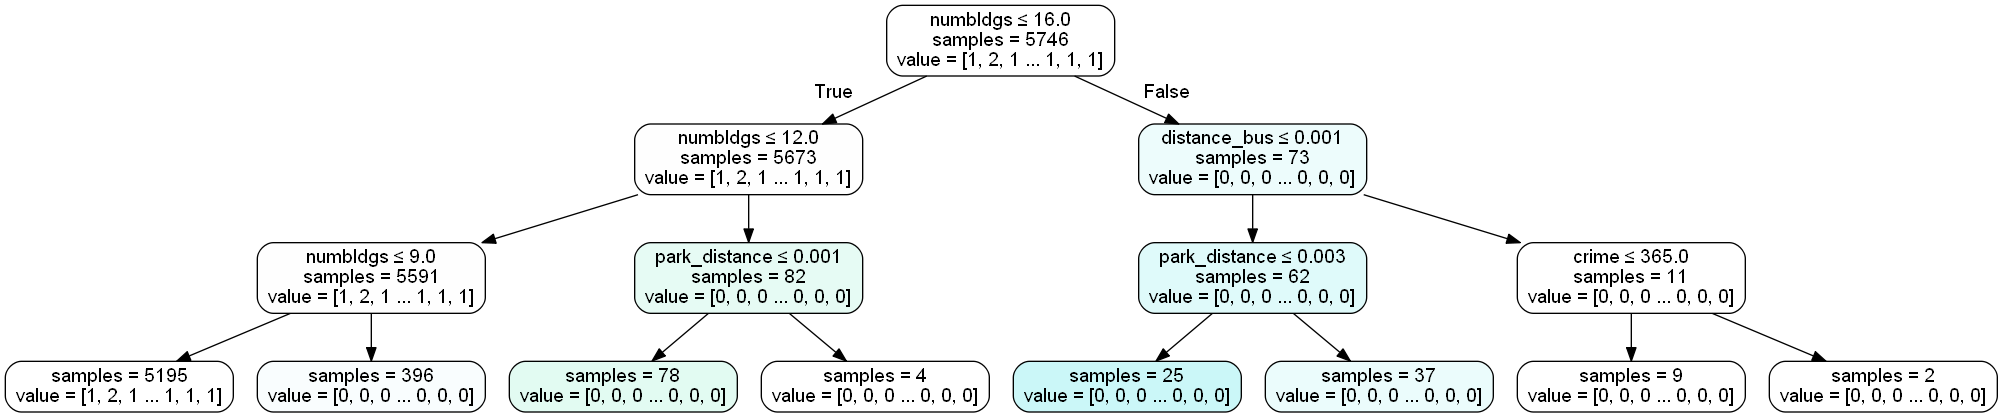

In [109]:
dt = DecisionTreeClassifier(max_depth=3) # just to keep it simple for visualization
dt.fit(X_train,Y_train)

thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

## Random forest

### Tuning hyper-parameters
https://www.kaggle.com/sociopath00/random-forest-using-gridsearchcv  
https://www.kaggle.com/ksjpswaroop/parameter-tuning-random-forest-gridsearchcv  
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74  

https://blog.csdn.net/qq_16633405/article/details/61200502  
https://cloud.tencent.com/developer/article/1087035

**Max fitting**

In [165]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
pred=rf.predict_proba(X_test)[:,1]
print("In sample R-squared: %f"%rf.score(X_train, Y_train))
print("Out of sample R-squared: %f"%rf.score(X_test, Y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In sample R-squared: 0.431605
Out of sample R-squared: 0.040622


In [167]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_features='auto', max_leaf_nodes=None, max_depth=100)

rf.fit(X_train, Y_train)
pred=rf.predict_proba(X_test)[:,1]
print("In sample R-squared: %f"%rf.score(X_train, Y_train))
print("Out of sample R-squared: %f"%rf.score(X_test, Y_test))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In sample R-squared: 0.436304
Out of sample R-squared: 0.042741


In [167]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_features='auto', max_leaf_nodes=None, max_depth=100)

rf.fit(X, Y_train)
pred=rf.predict_proba(X_test)[:,1]
print("In sample R-squared: %f"%rf.score(X_train, Y_train))
print("Out of sample R-squared: %f"%rf.score(X_test, Y_test))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In sample R-squared: 0.436304
Out of sample R-squared: 0.042741


**Max fitting**  
GridSearchCV

In [ ]:
param_grid = { 
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],    
    'criterion' :['gini', 'entropy']
}

In [ ]:
param_grid = { 
    'n_estimators': [100, 200, 300],
    'max_depth' : [3,4,5,6,7,8],    
}

In [ ]:
rf=RandomForestClassifier(random_state=42)
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(X_train, Y_train)

In [ ]:
CV_rfc.best_params_

In [158]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,max_leaf_nodes=100)
rf.fit(X_train, Y_train)
pred=rf.predict_proba(X_test)[:,1]
print("In sample R-squared: %f"%rf.score(X_train, Y_train))
print("Out of sample R-squared: %f"%rf.score(X_test, Y_test))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In sample R-squared: 0.274974
Out of sample R-squared: 0.057224


## Adaboost
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html  
https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_multiclass.html

In [111]:
from sklearn.ensemble import AdaBoostClassifier

In [112]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=600,
    learning_rate=1)
bdt_real.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=600, random_state=None)

In [113]:
print("In sample R-squared: %f"%bdt_real.score(X_train, Y_train))
print("Out of sample R-squared: %f"%bdt_real.score(X_test, Y_test))

In sample R-squared: 0.022624
Out of sample R-squared: 0.020134


## GradientBoosting
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html  
https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

In [123]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [184]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = GradientBoostingRegressor(**params)
clf.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

print("In sample R-squared: %f"%clf.score(X_train, Y_train))
print("Out of sample R-squared: %f"%clf.score(X_test, Y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 124723607203290.7031
In sample R-squared: 0.985478
Out of sample R-squared: 0.845023


### Tuning hyper-parameters
https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv

In [196]:
params = {'n_estimators': [100, 300, 500] , 
          'max_depth': [3, 4, 5], 
          'min_samples_split': [2, 10, 100], 
          'learning_rate': [0.01, 0.05, 0.1, 0.2],  
          'loss': ['ls']}

In [197]:
clf = GridSearchCV(GradientBoostingRegressor(), param_grid=params, cv=10, n_jobs=-1)
clf.fit(X_train, Y_train)

print(clf.score(X_train, Y_train))
print(clf.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9912318880256583
{'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 3, 'min_samples_split': 100, 'n_estimators': 500}


### original

In [225]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 10,
          'learning_rate': 0.05, 'loss': 'ls', 'random_state':42}

clf = GradientBoostingRegressor(**params)
clf.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

print("In sample R-squared: %f"%clf.score(X_train, Y_train))
print("Out of sample R-squared: %f"%clf.score(X_test, Y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 96196491120250.7031
In sample R-squared: 0.998388
Out of sample R-squared: 0.880470


### log

In [227]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 10,
          'learning_rate': 0.05, 'loss': 'ls', 'random_state':42}

clf = GradientBoostingRegressor(**params)
clf.fit(X_train, np.log(Y_train))

mse = mean_squared_error(np.log(Y_test), clf.predict(X_test))
print("MSE: %.4f" % mse)

print("In sample R-squared: %f"%clf.score(X_train, np.log(Y_train)))
print("Out of sample R-squared: %f"%clf.score(X_test, np.log(Y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.2521
In sample R-squared: 0.885531
Out of sample R-squared: 0.768152


### stardardized

In [228]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 10,
          'learning_rate': 0.05, 'loss': 'ls', 'random_state':42}

clf = GradientBoostingRegressor(**params)
clf.fit(X_standardized_train, Y_standardized_train)

mse = mean_squared_error(Y_standardized_test, clf.predict(X_standardized_test))
print("MSE: %.4f" % mse)

print("In sample R-squared: %f"%clf.score(X_standardized_train, Y_standardized_train))
print("Out of sample R-squared: %f"%clf.score(X_standardized_test, Y_standardized_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.1064
In sample R-squared: 0.998352
Out of sample R-squared: 0.887022


### PCA

In [226]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 10,
          'learning_rate': 0.05, 'loss': 'ls', 'random_state':42}

clf = GradientBoostingRegressor(**params)
clf.fit(X_standardized_train_PCA, Y_standardized_train)

mse = mean_squared_error(Y_standardized_test, clf.predict(X_standardized_test_PCA))
print("MSE: %.4f" % mse)

print("In sample R-squared: %f"%clf.score(X_standardized_train_PCA, Y_standardized_train))
print("Out of sample R-squared: %f"%clf.score(X_standardized_test_PCA, Y_standardized_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.2461
In sample R-squared: 0.997376
Out of sample R-squared: 0.738639


### feature selection

#### Top 10

In [266]:
selected_columns_top10 = abs(df.corr().iloc[:,:1]).sort_values('SALE PRICE')[-10:-1].index

In [267]:
params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 5,
          'learning_rate': 0.05, 'loss': 'ls', 'random_state':42}

clf = GradientBoostingRegressor(**params)
clf.fit(X_train[selected_columns_top10], Y_train)

mse = mean_squared_error(Y_test, clf.predict(X_test[selected_columns_top10]))
print("MSE: %.4f" % mse)

print("In sample R-squared: %f"%clf.score(X_train[selected_columns_top10], Y_train))
print("Out of sample R-squared: %f"%clf.score(X_test[selected_columns_top10], Y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 212235281669785.0000
In sample R-squared: 0.997639
Out of sample R-squared: 0.736285


#### original

In [251]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 10,
          'learning_rate': 0.05, 'loss': 'ls', 'random_state':42}

clf = GradientBoostingRegressor(**params)
clf.fit(X_train[selected_columns[1:]], Y_train)

mse = mean_squared_error(Y_test, clf.predict(X_test[selected_columns[1:]]))
print("MSE: %.4f" % mse)

print("In sample R-squared: %f"%clf.score(X_train[selected_columns[1:]], Y_train))
print("Out of sample R-squared: %f"%clf.score(X_test[selected_columns[1:]], Y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 91511648470627.7344
In sample R-squared: 0.997863
Out of sample R-squared: 0.886291


#### stardardized

In [274]:
params = {'n_estimators': 500, 'max_depth': 3, 'min_samples_split': 10,
          'learning_rate': 0.05, 'loss': 'ls', 'random_state':42}

clf = GradientBoostingRegressor(**params)
clf.fit(X_standardized_train[selected_columns[1:]], Y_standardized_train)

mse = mean_squared_error(Y_standardized_test, clf.predict(X_standardized_test[selected_columns[1:]]))
print("MSE: %.4f" % mse)

print("In sample R-squared: %f"%clf.score(X_standardized_train[selected_columns[1:]], Y_standardized_train))
print("Out of sample R-squared: %f"%clf.score(X_standardized_test[selected_columns[1:]], Y_standardized_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.1094
In sample R-squared: 0.995882
Out of sample R-squared: 0.883805


##### Tuning hyper-parameters

In [254]:
params = {'n_estimators': [500] , 
          'max_depth': [3, 4, 5, 6, 7, 8], 
          'min_samples_split': [10], 
          'learning_rate': [0.05],  
          'loss': ['ls'], 
          'random_state':[42]}

In [255]:
clf = GridSearchCV(GradientBoostingRegressor(), param_grid=params, cv=10, n_jobs=-1)
clf.fit(X_standardized_train[selected_columns[1:]], Y_standardized_train)

print(clf.score(X_standardized_train[selected_columns[1:]], Y_standardized_train))
print(clf.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9978822375458263
{'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 500, 'random_state': 42}


In [259]:
params = {'n_estimators': [500] , 
          'max_depth': [4], 
          'min_samples_split': [8,9,10,15], 
          'learning_rate': [0.05],  
          'loss': ['ls'], 
          'random_state':[42]}

In [260]:
clf = GridSearchCV(GradientBoostingRegressor(), param_grid=params, cv=10, n_jobs=-1)
clf.fit(X_standardized_train[selected_columns[1:]], Y_standardized_train)

print(clf.score(X_standardized_train[selected_columns[1:]], Y_standardized_train))
print(clf.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9976011610774681
{'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 4, 'min_samples_split': 15, 'n_estimators': 500, 'random_state': 42}


## Decision tree & KNN & AdaBoostRegressor
https://github.com/vishnu1729/boston-housing-price-prediction-using-regression/blob/master/bostonData.ipynb

In [166]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [149]:
# Performance Metric
# Defining the R^2 score as the performance measure.
def perfMetric(groundTruth,predicted):
    perfScore = r2_score(groundTruth,predicted)  # compute the R^2 score as a measure of error
    return perfScore

In [150]:
# Model Complexity Curve Generation
# The model complexity depict the behavior of the model when the complexity of the model is varied. The training error and test error are recorded as the model parameter is progressivley increased.

def modelComplexity(estimatorType,parameter,Xtrain,Ytrain,Xtest, Ytest):
    paramRange = np.arange(1,parameter)  # the model complexity parameters are varied from 2 to the specified parameter value
    
    # Note: pre-allocation as trainError = testError = np.zeros... does not work as the trainError and testError are always 
    #       held equal by that type of assignment
    trainError = np.zeros(len(range(0,len(paramRange)))) # pre-allocate array to record training error
    testError = np.zeros(len(range(0,len(paramRange))))  # pre-allocate array to record test error
    
    for i in range(len(paramRange)):
        # generate the appropriate estimator with the parameter in the loop
        if estimatorType == 'Decision Tree':
            estimator = DecisionTreeRegressor(max_depth = paramRange[i])
        elif estimatorType == 'kNN':
            estimator = KNeighborsRegressor(n_neighbors = paramRange[i])
        else:
            estimator = AdaBoostRegressor(n_estimators = paramRange[i])
        estimator.fit(Xtrain,Ytrain)
        trainError[i] = perfMetric(Ytrain,estimator.predict(Xtrain)) # record training error for the current parameter value
        testError[i] = perfMetric(Ytest,estimator.predict(Xtest))    # record test error for the current parameter value
    
    # plot the model complexity curves i.e the training error and test error
    plt.figure()
    plt.suptitle('Model complexity curves for %s' % (estimatorType))
    plt.plot(paramRange,testError,lw = 2,label = 'Test Error')
    plt.plot(paramRange,trainError,lw = 2, label = 'Train Error')
    plt.xlabel('Complexity parameter')
    plt.ylabel('R2 Score')
    plt.legend(loc = 'lower right')
    plt.show()

In [151]:
# Learning Curve Generation
# The learning curves depict the behavior of the model with varying training set sizes. The training error and test error are recorded as the training set size is prigressively increased.

def learningCurves(estimatorType,parameter,Xtrain,Ytrain,Xtest,Ytest):
    
    bestParam = parameter      #the parameter given by the user on examination of the model complexity curves 
    if estimatorType == 'Decision Tree':
        estimator = DecisionTreeRegressor(max_depth = bestParam)
        numSamples = np.around(np.linspace(1,Xtrain.shape[0]))
    elif estimatorType == 'kNN':
        estimator = KNeighborsRegressor(n_neighbors = bestParam)
        numSamples = np.around(np.linspace(bestParam,Xtrain.shape[0]))   # the number of training samples is varied from the 
                                                                         # neightbors since scikit learn requires 
                                                                         # n_samples >= n_neighbors
    else:
        estimator = AdaBoostRegressor(n_estimators = bestParam)
        numSamples = np.around(np.linspace(1,Xtrain.shape[0]))    
    
    # numSamples is the array containing number of samples to pass in each iteration
    numSamples = numSamples.astype(int)   # numSamples is converted to int to avoid a Deprecation Warning
    trainError = np.zeros(len(numSamples)) 
    testError = np.zeros(len(numSamples))
    # the number of training samples is progressivley increased
    # the training and test error are recorded in each pass
    for i in range(len(numSamples)):
        estimator.fit(Xtrain[:numSamples[i]],Ytrain[:numSamples[i]])
        trainError[i] = perfMetric(Ytrain[:numSamples[i]],estimator.predict(Xtrain[:numSamples[i]])) 
        testError[i] = perfMetric(Ytest,estimator.predict(Xtest))
    
    # plot the learning curves 
    plt.suptitle('Learning curves for %s at model complexity parameter set to %d' % (estimatorType,bestParam))
    plt.plot(numSamples,testError,label = 'Test Error')
    plt.plot(numSamples,trainError,label = 'Train Error')
    plt.xlabel('Training set size')
    plt.ylabel('R2 Score')
    plt.legend(loc = 'lower right')
    plt.show()

In [169]:
# Model fitting using Grid Search
# Based on the characteristics of the model studied with the above generated curves, a final grid-search with 10-fold cross validation is performed to find the best parameters and the model is fitted for prediction on the unknown test set.

def fitModel(estimatorType,X,y):
    folds = KFold(X.shape[0],n_folds = 10,shuffle=True, random_state=40) #KFold object holds attirbutes for grid search
    # generate the parameter gris according to the type of the estimator
    if estimatorType == 'Decision Tree':
        model = DecisionTreeRegressor()
        parameters = {"max_depth":list(range(1,10))} # depth parameter for decision tree
    elif estimatorType == 'kNN':
        model = KNeighborsRegressor()
        parameters = {"n_neighbors":list(range(1,10))} # neighbors parameter for kNN
    else:
        model = AdaBoostRegressor()
        parameters = {"n_estimators":list(range(1,10))} # number of base learners for Adaboost
    
    scoreFun = make_scorer(perfMetric)   # make the defined performance metric into a valid scoring function
    paramGrid = GridSearchCV(model,parameters,scoreFun,cv=folds)  # perform grid search
    paramGrid = paramGrid.fit(X,y)
    return paramGrid.best_estimator_     #return the estimator with the best parameters

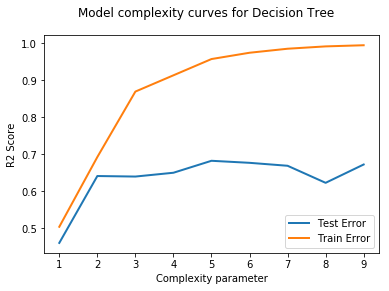

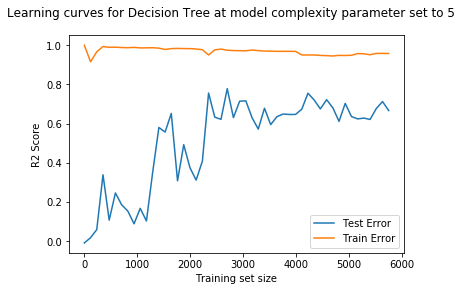

In [156]:
estimatorType = 'Decision Tree'
modelComplexity(estimatorType,10,X_train,Y_train,X_test,Y_test)    # generate model complexity curves
learningCurves(estimatorType,5,X_train,Y_train,X_test,Y_test)      # generate learning curves

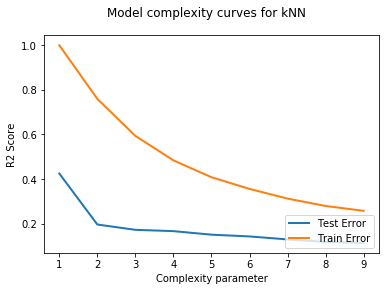

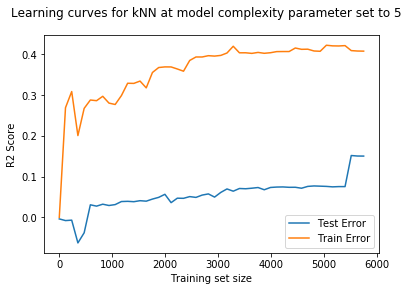

In [157]:
estimatorType = 'kNN'
modelComplexity(estimatorType,10,X_train,Y_train,X_test,Y_test)    # generate model complexity curves
learningCurves(estimatorType,5,X_train,Y_train,X_test,Y_test)      # generate learning curves

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

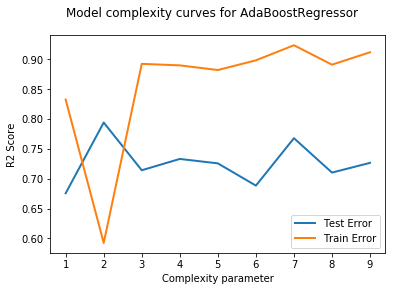

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

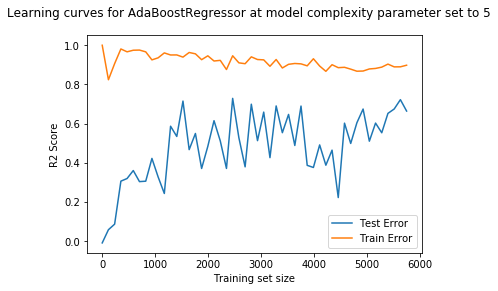

In [159]:
estimatorType = 'AdaBoostRegressor'
modelComplexity(estimatorType,10,X_train,Y_train,X_test,Y_test)    # generate model complexity curves
learningCurves(estimatorType,5,X_train,Y_train,X_test,Y_test)      # generate learning curves

## XGBoost

## LightGBM

## SVM (missed)

## Bayesian Methods

## Bayesian Networks

## Gaussian Processes

## Clustering